In [14]:
#Data Acquisition
# lets here import the pandas library for data reading
import pandas as pd

In [15]:
#lets read our csv data here
data = pd.read_csv(r"/kaggle/input/loan-approval/loan_approval.csv")

In [16]:
#showing first 5 entries from the dataset
data.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [18]:
# lets take overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [19]:
# lets gets information in statistical way of our dataset
data.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [20]:
# coulmn names present inthe dataset
data.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

In [21]:
# printing the categorical columns from the dataset
cat_clm = data.select_dtypes(include="object")

In [22]:
cat_clm

,name,city
0,Allison Hill,East Jill
1,Brandon Hall,New Jamesside
2,Rhonda Smith,Lake Roberto
3,Gabrielle Davis,West Melanieview
4,Valerie Gray,Mariastad
...,...,...
1995,James Schaefer,Robertton
1996,Diana Lin,New Frank
1997,Brandon Meyer,East Haley
1998,Jason Price,Adamland


In [23]:
# likewise lets print only numerical value clm
num_clm = data.select_dtypes(include=["int64","float64"])

In [24]:
num_clm

,income,credit_score,loan_amount,years_employed,points
0,113810,389,39698,27,50.0
1,44592,729,15446,28,55.0
2,33278,584,11189,13,45.0
3,127196,344,48823,29,50.0
4,66048,496,47174,4,25.0
...,...,...,...,...,...
1995,92163,770,12251,13,85.0
1996,38799,635,48259,17,40.0
1997,41957,763,16752,5,60.0
1998,139022,360,24031,35,55.0


In [25]:
# same for the bool clm
bool_clm = data.select_dtypes(include="bool")

In [26]:
bool_clm

,loan_approved
0,False
1,False
2,False
3,False
4,False
...,...
1995,True
1996,False
1997,True
1998,False


In [27]:
#Data Wrangling:
# lets check if any missing values present or not
data.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [28]:
# lets check for the unique values
data.nunique()

name              2000
city              1882
income            1988
credit_score       537
loan_amount       1968
years_employed      41
points              19
loan_approved        2
dtype: int64

In [29]:
# lets try out with duplicate
data.duplicated

<bound method DataFrame.duplicated of                  name              city  income  credit_score  loan_amount  \
0        Allison Hill         East Jill  113810           389        39698   
1        Brandon Hall     New Jamesside   44592           729        15446   
2        Rhonda Smith      Lake Roberto   33278           584        11189   
3     Gabrielle Davis  West Melanieview  127196           344        48823   
4        Valerie Gray         Mariastad   66048           496        47174   
...               ...               ...     ...           ...          ...   
1995   James Schaefer         Robertton   92163           770        12251   
1996        Diana Lin         New Frank   38799           635        48259   
1997    Brandon Meyer        East Haley   41957           763        16752   
1998      Jason Price          Adamland  139022           360        24031   
1999     Nicole Brown    New Nathantown   41188           482        31397   

      years_employed  poi

In [30]:
# selecting the depedent and independent varibales
x = data.drop("loan_approved", axis= 1)
y = data["loan_approved"]

In [31]:
#lets encode of categorical clm into numbers 
d_data = pd.get_dummies(x,columns=["name","city"],drop_first= True)

In [32]:
# lets convert the false/true value in 0/1 
cl_data = d_data.replace({"True":1,"False":0,True: 1, False: 0})
cl_data.head()

/tmp/ipykernel_37/4184765640.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cl_data = d_data.replace({"True":1,"False":0,True: 1, False: 0})


,income,credit_score,loan_amount,years_employed,points,name_Aaron Barber,name_Aaron Gonzalez,name_Aaron Jennings,name_Aaron Kelly,name_Aaron Miller,...,city_Wilsonton,city_Wilsonview,city_Wongburgh,city_Woodsburgh,city_Wrightchester,city_Yatesbury,city_Youngbury,city_Yumouth,city_Zacharyton,city_Zamoramouth
0,113810,389,39698,27,50.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44592,729,15446,28,55.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33278,584,11189,13,45.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,127196,344,48823,29,50.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,66048,496,47174,4,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


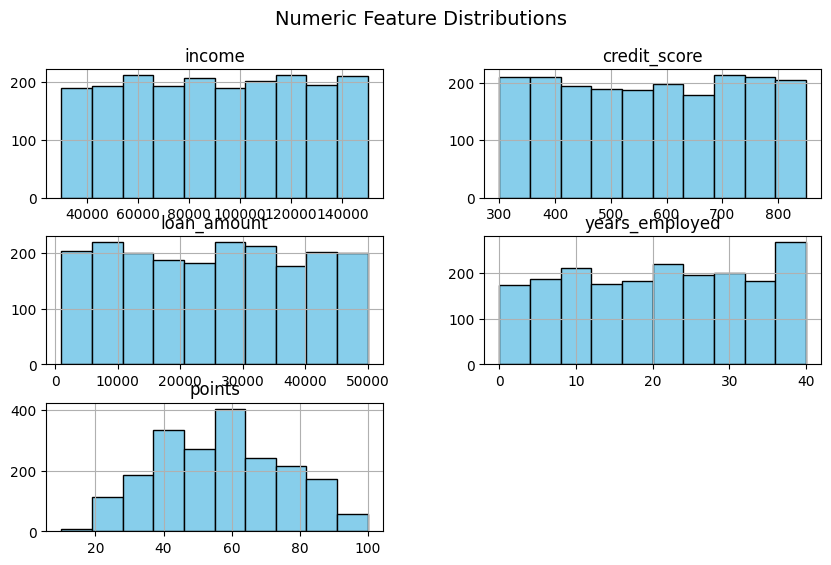

In [48]:
#Data Exploration
# now lets perform visulaizations
import matplotlib.pyplot as plt
data.hist(figsize=(10,6), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()

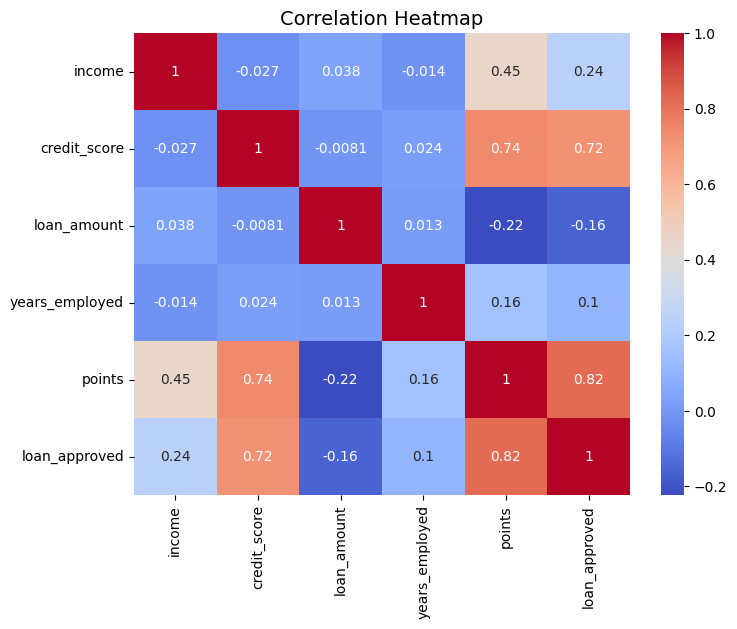

In [50]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

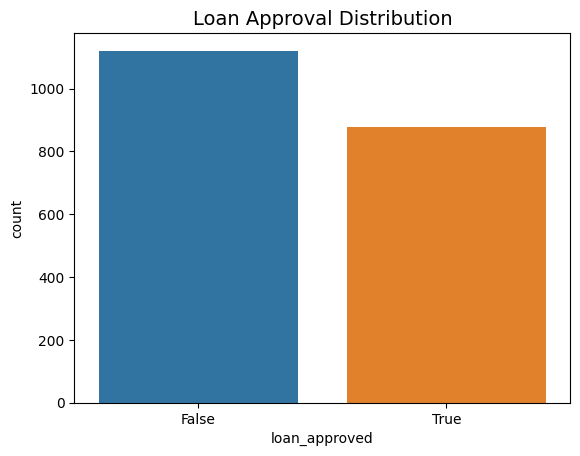

In [51]:
sns.countplot(x='loan_approved', data=data)
plt.title("Loan Approval Distribution", fontsize=14)
plt.show()

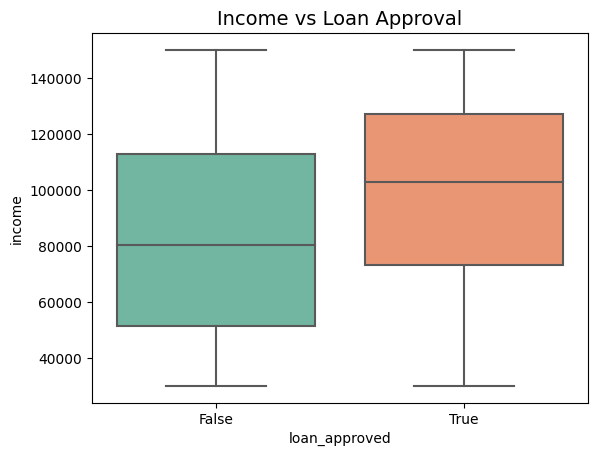

In [52]:
sns.boxplot(x='loan_approved', y='income', data=data, palette='Set2')
plt.title("Income vs Loan Approval", fontsize=14)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

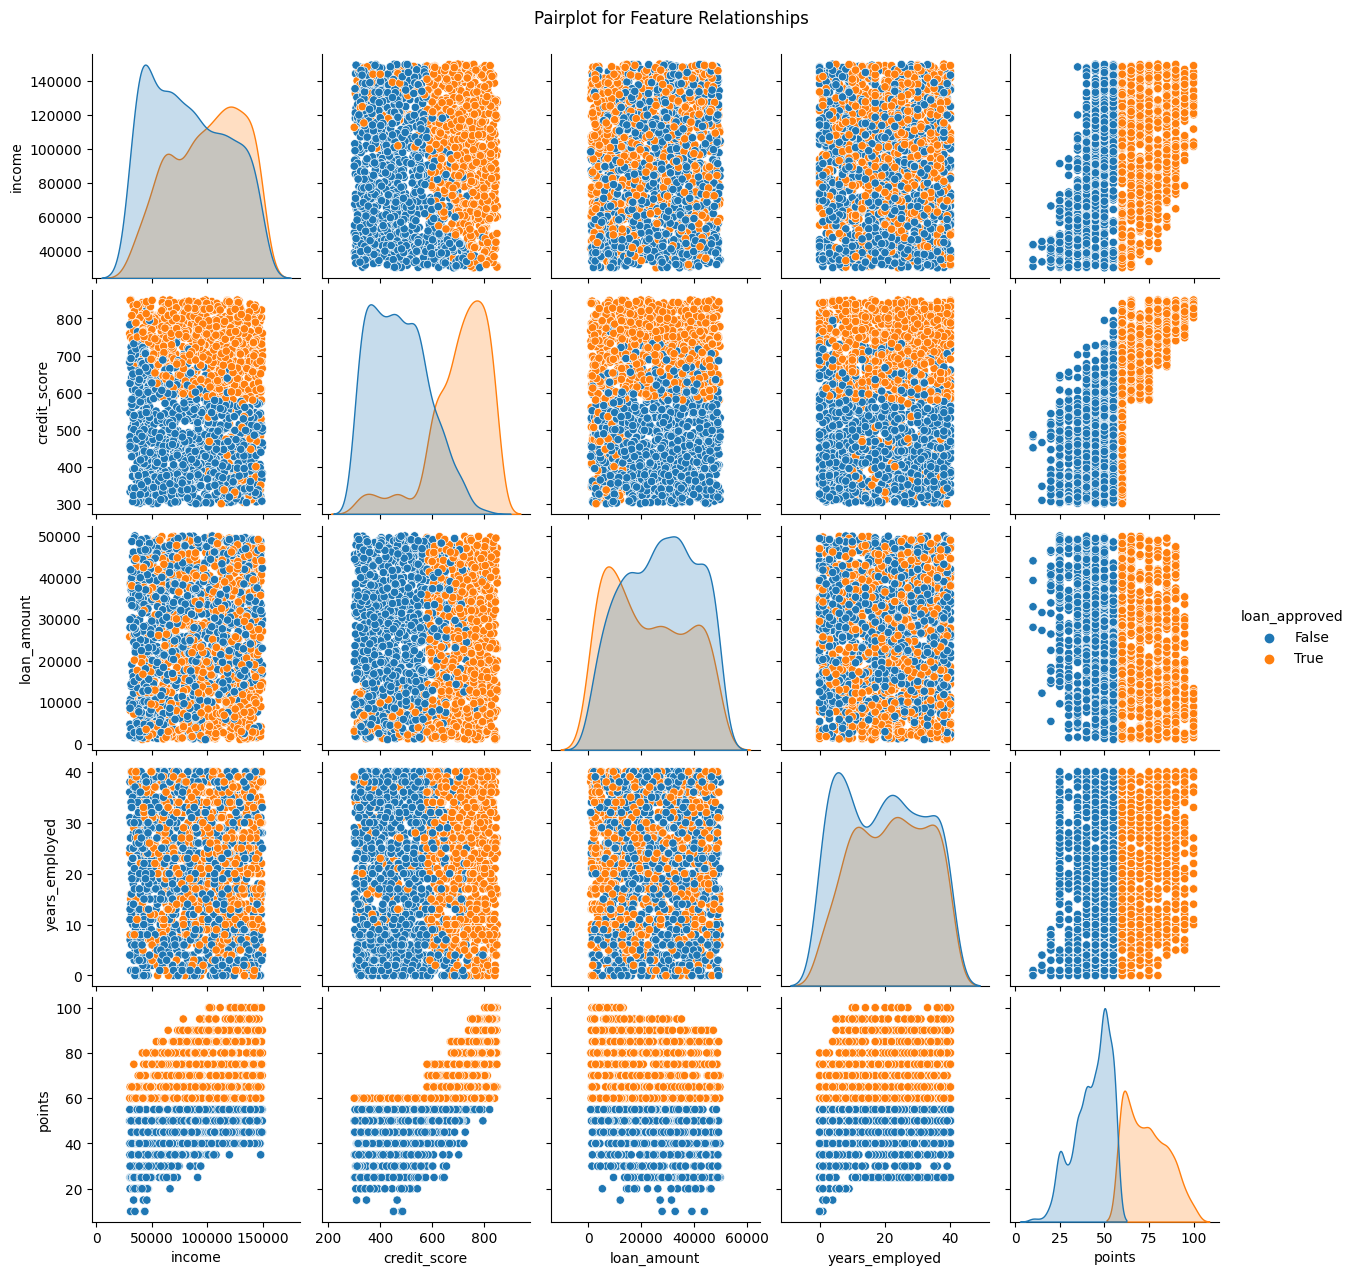

In [54]:
sns.pairplot(data, hue='loan_approved')
plt.suptitle("Pairplot for Feature Relationships", y=1.02)
plt.show()

In [33]:
#Data Mining and Analysis
# now lets split the dataset into dependent and idependent variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cl_data,y, test_size = 0.2)

In [34]:
# lets check the shape 
x_train.shape, y_train.shape

((1600, 3885), (1600,))

In [35]:
x_test.shape, y_test.shape

((400, 3885), (400,))

In [40]:
# selecting the model
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()

In [42]:
nb.fit(x_train, y_train)

GaussianNB()

In [46]:
# lets check our models accuracy score, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9675

Confusion Matrix:
 [[221   2]
 [ 11 166]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       223
        True       0.99      0.94      0.96       177

    accuracy                           0.97       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400

